# This Notebook describes the delock of a feedback loop in TDM.
### L. Ravera @IRAP
### June 15, 2020

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def plot_pulse(half_DAC_FSR, FB0, ax, ylabel=False):

    npts=2**12
    t=10e-3*np.arange(npts)/npts

    # Trise / Tfall at L for LPA2.5A pixel
    taurise=52.75e-6
    taufall=785.35e-6
    pulse=FB0*np.ones(len(t))
    i1=200
    pulse[i1:]+=6.8*(np.exp(-t[:-i1]/taurise)-np.exp(-t[:-i1]/taufall))

    c='slategrey'
    ax.plot(t*1e3, pulse, linewidth=3, color=c)
    ax.plot(t*1e3, pulse+1, linewidth=3, color=c)
    ax.plot([0, 10], [half_DAC_FSR, half_DAC_FSR], '--k')
    ax.plot([0, 10], [-half_DAC_FSR, -half_DAC_FSR], '--k')
    ax.plot([0, 10], [0,0], ':k')
    ax.set_xlabel('Time (ms)')
    ax.set_yticks(np.arange(11)*2-10)
    if ylabel:
            ax.set_ylabel(r'Feedback flux ($\Phi_0$)')
    ax.arrow(4, 0, 0, half_DAC_FSR, 
            length_includes_head=True, head_width=0.1, head_length=0.5, 
            width=0.01, fc='k', ec='k')
    ax.arrow(4, 0, 0, -half_DAC_FSR, 
            length_includes_head=True, head_width=0.1, head_length=0.5, 
            width=0.01, fc='k', ec='k')
    ax.text(4-0.2, 0, 'DAC FSR', color='k', verticalalignment='top', rotation='vertical')
    ax.set_xlim(0, 5)
    ax.set_ylim(-10, 10)



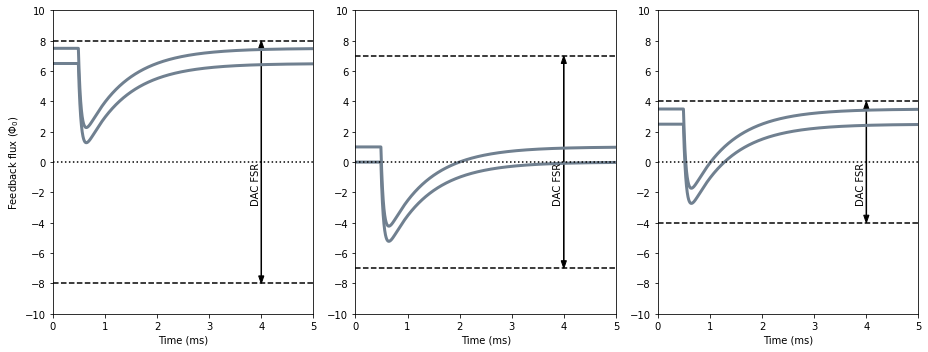

In [25]:

fig=plt.figure(1,(13,5))
ax1=fig.add_subplot(1,3,1)
half_DAC_FSR=8
plot_pulse(half_DAC_FSR, 6.5, ax1, True)

ax2=fig.add_subplot(1,3,2)
half_DAC_FSR=7
plot_pulse(half_DAC_FSR, 0, ax2)

ax3=fig.add_subplot(1,3,3)
half_DAC_FSR=4
plot_pulse(half_DAC_FSR, 2.5, ax3)

fig.tight_layout()
plt.savefig('pulse.png', dpi=300, bbox_inches='tight')



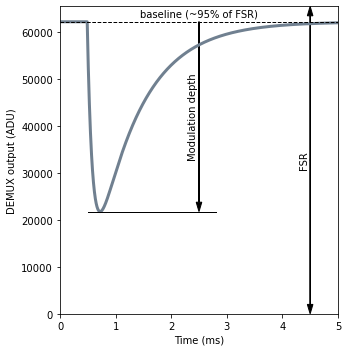

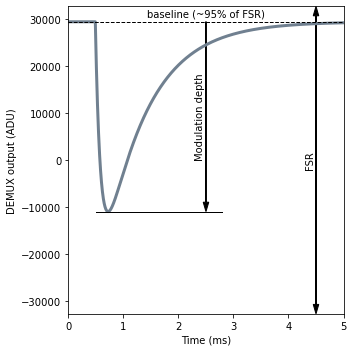

In [26]:
npts=2**12
t=10e-3*np.arange(npts)/npts

# Trise / Tfall at L for LPA2.5A pixel
taurise=96.8e-6
taufall=796e-6

modulation_depth = 0.65 # defines the energy, corresponds to 7keV photons

# Baseline
nbits = 16
FSR = 2**nbits
margin = 0.05 # Pour ne pas coller la baseline au FSR
baseline = FSR*(1-margin)
pulse=np.zeros(len(t))
i1=200
pulse[i1:]=np.exp(-t[:-i1]/taurise)-np.exp(-t[:-i1]/taufall)
pulse_height = pulse.max()-pulse.min()
signal = baseline * (1 + modulation_depth * pulse / pulse_height)

c='slategrey'

# Plot with unsigned 16-bit int at DEMUX output
fig=plt.figure(2,(13,5))
ax=fig.add_subplot(1,3,1)
ax.plot(t*1e3, signal, linewidth=3, color=c)
ax.plot([0,10], [baseline, baseline], '--k', linewidth=1)
ax.plot([0.5,2.8], [signal.min(), signal.min()], '-k', linewidth=1)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'DEMUX output (ADU)')
ax.set_xlim(0, 5)
ax.set_ylim(0, FSR)

ax.arrow(4.5, FSR/2, 0, FSR/2, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax.arrow(4.5, FSR/2, 0, -FSR/2, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax.text(4.5-0.2, FSR/2, 'FSR', color='k', verticalalignment='center', rotation='vertical')
ax.text(2.5, baseline+1000, 'baseline (~95% of FSR)', color='k', horizontalalignment='center', rotation='horizontal')

ax.arrow(2.5, baseline, 0, -baseline*modulation_depth, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax.text(2.5-0.2, baseline * (1 - modulation_depth/2), 'Modulation depth', color='k', verticalalignment='center', rotation='vertical')

fig.tight_layout()
plt.savefig('demux_out_unsigned.png', dpi=300, bbox_inches='tight')


# Plot with signed 16-bit int at DEMUX output
signal_signed=signal-2**15
fig2=plt.figure(3,(13,5))
ax2=fig2.add_subplot(1,3,1)
ax2.plot(t*1e3, signal_signed, linewidth=3, color=c)
ax2.plot([0,10], [baseline-2**15, baseline-2**15], '--k', linewidth=1)
ax2.plot([0.5,2.8], [signal_signed.min(), signal_signed.min()], '-k', linewidth=1)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel(r'DEMUX output (ADU)')
ax2.set_xlim(0, 5)
ax2.set_ylim(-FSR/2, FSR/2)

ax2.arrow(4.5, 0, 0, FSR/2, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax2.arrow(4.5, 0, 0, -FSR/2, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax2.text(4.5-0.2, 0, 'FSR', color='k', verticalalignment='center', rotation='vertical')
ax2.text(2.5, baseline-2**15+1000, 'baseline (~95% of FSR)', color='k', horizontalalignment='center', rotation='horizontal')

ax2.arrow(2.5, baseline-2**15, 0, -baseline*modulation_depth, 
        length_includes_head=True, head_width=0.1, head_length=2000, 
        width=0.01, fc='k', ec='k')
ax2.text(2.5-0.2, baseline * (1 - modulation_depth/2)-2**15, 'Modulation depth', color='k', verticalalignment='center', rotation='vertical')

fig2.tight_layout()
plt.savefig('demux_out_signed.png', dpi=300, bbox_inches='tight')
